<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [480]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Added numpy and seaborn to the original list

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [481]:
movies = pd.read_csv('./data/imdb_1000.csv')  # movies will be the original csv based dataframe throughout
movies.head()  # Additional step to show quick view of the csv dataframe format

# ----MB-Notes---- #
# The csv file must be in the same root directory as this notebook using the above notation

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [482]:
print('Number of rows: ' + str(len(movies.index)))
print('Number of columns: ' + str(len(movies.columns)))

# ----MB-Notes---- #
# Line 1 doesn't need the .index notation as this is the default position but it's good practice to include it

Number of rows: 979
Number of columns: 6


#### Check the data type of each column.

In [483]:
movies.dtypes  # Standard proceedure

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [484]:
print('Avg movie duration: ' + str(round(movies.duration.mean(), 2)) + ' minutes')

# ----MB-Notes---- #
# The 'round' function has been used to shorten the answer to 2 decimal places

Avg movie duration: 120.98 minutes


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [485]:
movies_sorted = pd.DataFrame()  # Not necessary but I think it's always good practive to define new objects
movies_sorted = movies.sort_values('duration', ascending=True)

print('Shortest Film: ' + str(movies_sorted['title'].iloc[0]) + ' (' + str(movies_sorted['duration'].iloc[0]) + ' mins)')
print('Longest Film: ' + str(movies_sorted['title'].iloc[-1]) + ' (' + str(movies_sorted['duration'].iloc[-1]) + ' mins)')

# ----MB-Notes---- #
# The .iloc works on [row_num, col_num] syntax starting from 0
# You must update the dataframe (or in this case create a new df called movies_sorted) before printing otherwise it'll revert to the original dataframe
# movies_sorted.duration.describe() - can be used to check min and max values as a double check

Shortest Film: Freaks (64 mins)
Longest Film: Hamlet (242 mins)


#### Create a histogram of duration, choosing an "appropriate" number of bins.

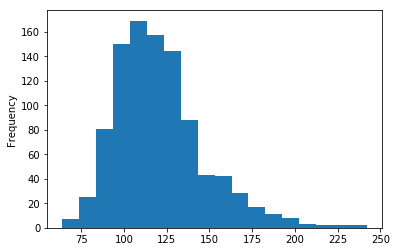

In [486]:
movies.duration.plot.hist(bins = 18)

# ----MB-Notes---- #
# I chose 18 bins as diff between longest & shortest film is 178 mins so each bins represents approx. 10 mins

#### Use a box plot to display that same data.

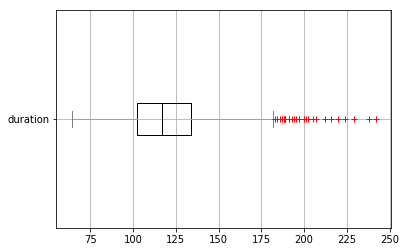

In [487]:
color_1 = dict(boxes='Black', whiskers='DarkOrange', medians='Black', caps='Gray')
movies.duration.plot.box(vert=False, grid='True', color=color_1, sym='r+')

# ----MB-Notes---- #
# Coloring the plot using a defined dictionary is clearly optional but good practice
# Box plots can be drawn calling Series.plot.box(), DataFrame.plot.box() or DataFrame.boxplot()
# Chose a horizontal box plot as I think it's better to have time on the horizontal axis

## Intermediate level

#### Count how many movies have each of the content ratings.

In [488]:
movies.content_rating.value_counts(dropna = False)

# ----MB-Notes---- #
# Important to include dropna = False as the default is true which will miss 3 blank nan values

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
NaN            3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0,0.5,'Movie Rating')

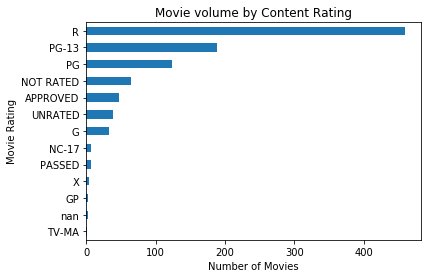

In [489]:
rating_df = pd.DataFrame()  # Not necessary but I think it's always good practive to define new objects
rating_df = movies.content_rating.value_counts(ascending = True, dropna = False).reset_index().rename(columns={'index': 'content_rating', 'content_rating': 'frequency'})

rating_plot = rating_df.plot.barh(x = 'content_rating', legend = False, title = 'Movie volume by Content Rating')
rating_plot.set_xlabel('Number of Movies')
rating_plot.set_ylabel('Movie Rating')

# ----MB-Notes---- #
# The creation of rating_df isn't totally necessary but it's better to keep things clean, especially for later calcs
# barh is a horizontal bar compared to just bar which is vertical

# ----Option 2---- #
# This option is simpler but I think having a data frame is better in the long run
# ---------------- #
# movies.content_rating.value_counts(dropna=False).plot.barh()
# plt.title('Movie volume by Content Rating')
# plt.xlabel('Number of Movies')
# plt.ylabel('Movie Rating')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [490]:
movies_adj1 = pd.DataFrame()
movies_adj1 = movies.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'],['UNRATED', 'UNRATED', 'UNRATED', 'UNRATED'])
movies_adj1.content_rating.value_counts(dropna=False)

# ----MB-Notes---- #
# The creation of movies_adj1 isn't totally necessary but it's better not to change the original csv data

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
NaN          3
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [491]:
movies_adj2 = movies_adj1.replace(['X', 'TV-MA'],['NC-17', 'NC-17'])
movies_adj2.content_rating.value_counts(dropna=False)

# ----MB-Notes---- #
# This code makes further adjustments to the already adjusted df movies_adj1 so created another df

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
NaN          3
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [492]:
movies_adj2.isnull().sum()  # Standard proceedure

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [493]:
movies_adj2[movies_adj2.isnull().any(axis=1)]
# Used to examine all items in movies_adj2 that have a NaN value - won't show due to preceeding code

movies_adj3 = movies_adj2.fillna('UNRATED')
movies_adj3.content_rating.value_counts(dropna=False)

# ----MB-Notes---- #
# Once again I've created a new dataframe so as not to lose data from the previous step

R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [494]:
print('Movies > 2hrs Duration: ' + str(round(movies_adj3[movies_adj3.duration > 120].star_rating.mean(), 2)) + ' Avg. Stars')
print('Movies <= 2hrs Duration: ' + str(round(movies_adj3[movies_adj3.duration <= 120].star_rating.mean(), 2)) + ' Avg. Stars')

# ----MB-Notes---- #
# The round function has been used to round star ratings to 2 decimal places

Movies > 2hrs Duration: 7.95 Avg. Stars
Movies <= 2hrs Duration: 7.84 Avg. Stars


#### Use a visualization to detect whether there is a relationship between duration and star rating.

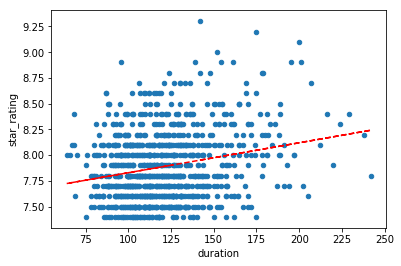

In [495]:
movies_adj3.plot.scatter(x = 'duration', y = 'star_rating')

# Add Trendline using standard numpy code
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r--')
plt.show()

# ----MB-Notes---- #
# Answer: Star ratings appear to increase as movie duration increases

#### Calculate the average duration for each genre.

In [496]:
movies_adj3.groupby(['genre']).duration.mean()

# ----MB-Notes---- #
# This is the simplest way without creating a new dataframe

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

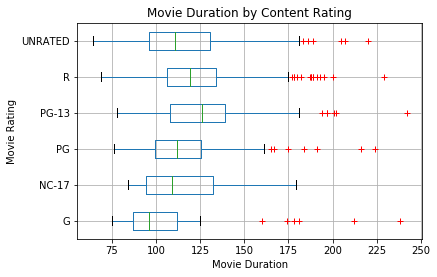

In [497]:
rating_plot_2 = movies_adj3.boxplot(by = 'content_rating', column = 'duration', vert=False, grid='True', sym='r+')
rating_plot_2.set_title('Movie Duration by Content Rating')
rating_plot_2.set_xlabel('Movie Duration')
rating_plot_2.set_ylabel('Movie Rating')
plt.suptitle('')

# ----MB-Notes---- #
# Boxplot is the best relationship comparison visulaisation in this case
# plt.suptitle('') is needed to remove the default title generated by .boxplot

#### Determine the top rated movie (by star rating) for each genre.

In [498]:
movies_adj4 = movies_adj3.copy()  
# --------------------

movies_adj4['compare'] = movies_adj4.duplicated(subset = 'genre', keep = 'first')
# copy the dataframe and check for duplicate genres, making the first instances as 'False' as it's not a duplicate
# this is important as it means only the first instance of the genre will be marked false
# Note this only works as the dataframe is already sorted in star_rating order

col_names_a =  ['genre', 'title', 'star_rating']
top_rated_df  = pd.DataFrame(columns = col_names_a)
# Create a blank dataframe called top_rated to populate, making the output clearer

for index, row in movies_adj4.iterrows():  # interate through the dataframe index 
    if row['compare'] == False: # if the 'compare column' is False it's the first instance of that genre
        top_rated_df.loc[len(top_rated_df)] = [row['genre'], row['title'], row['star_rating']]  # add the film data to the dataframe

top_rated_df    
    
# ----MB-Notes---- #
# The .copy function is used to create a new dataframe so we don't adjust the previous version

# ----Option 2---- #
# Simpler option without using a dataframe but the output isn't as clear
# ---------------- #
# movies_adj4 = movies_adj3.copy()  
# movies_adj4['compare'] = movies_adj4.duplicated(subset = 'genre', keep = 'first')

# for index, row in movies_adj4.iterrows():
#     if row['compare'] == False and row['compare'] not in genre_list:
#         print(row['genre'], row['title'], row['star_rating'])

,genre,title,star_rating
0,Crime,The Shawshank Redemption,9.3
1,Action,The Dark Knight,9.0
2,Drama,12 Angry Men,8.9
3,Western,"The Good, the Bad and the Ugly",8.9
4,Adventure,The Lord of the Rings: The Return of the King,8.9
5,Biography,Schindler's List,8.9
6,Comedy,Life Is Beautiful,8.6
7,Animation,Spirited Away,8.6
8,Mystery,Rear Window,8.6
9,Horror,Psycho,8.6


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [499]:
movies_adj5 = movies_adj3.copy()  # Make a copy so we don't overwrite original dataframe
# --------------------

movies_adj5['title_dup'] = movies_adj5.duplicated(subset = 'title', keep = False)
# Add a column to indicate duplicate titles

total_records = int(len(movies_adj5.index))
unique_movie_titles = int(movies_adj5.groupby('title')['title'].nunique().sum())
# Calculate total records and unique titles - many ways to do this i.e. you could just count the Flase values in title_dup

print('Total Movie Records: ' + str(total_records))
print('Unique Movie Titles: ' + str(unique_movie_titles))
print('Duplicate Movie Titles: ' + str(total_records - unique_movie_titles))

movies_adj5.loc[movies_adj5['title_dup'] == True]
# Return only the records that have duplicate titles

# ----MB-Notes---- #
# Answer: Films aren't duplicates as actors/actresses are different - assumption is that they are different films

Total Movie Records: 979
Unique Movie Titles: 975
Duplicate Movie Titles: 4


,star_rating,title,content_rating,genre,duration,actors_list,title_dup
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",True
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",True
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",True
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",True
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",True
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",True
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",True
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",True


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


Option 1: manually create a list of relevant genres, then filter using that list

In [500]:
movies_adj6 = movies_adj3.copy()  # Make a copy so we don't overwrite original dataframe
# --------------------

genre_list_Manual = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
# List manually created from the csv as suggested in option 1

movies_adj6 = movies_adj6[movies_adj6['genre'].isin(genre_list_Manual)]
round(movies_adj6.groupby(['genre']).star_rating.mean(), 2)

# ----MB-Notes---- #
# Filter the dataframe and overwrite it with only those rows who's genre is in the genre_list
# Calculate the average star rating by genre

genre
Action       7.88
Adventure    7.93
Animation    7.91
Biography    7.86
Comedy       7.82
Crime        7.92
Drama        7.90
Horror       7.81
Mystery      7.98
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [501]:
movies_adj7 = movies_adj3.copy()  # Make a copy so we don't overwrite original dataframe
# --------------------

genre_count_1 = pd.DataFrame()
genre_count_1 = movies_adj7['genre'].value_counts().reset_index().rename(columns={'index': 'genre', 'genre': 'frequency'})

genre_list_Auto = []

for index, row in genre_count_1.iterrows():  # Iterate through the dataframe
    if row['frequency'] >= 10:  # Check to see if the frequency is 10 or more 
        genre_list_Auto.append(row['genre'])  # if frequency is >- 10 then add it to the genre_list
        
movies_adj7 = movies_adj7[movies_adj7['genre'].isin(genre_list_Auto)]
round(movies_adj6.groupby(['genre']).star_rating.mean(), 2)

# ----MB-Notes---- #
# Similar to option 1 but with a for loop

genre
Action       7.88
Adventure    7.93
Animation    7.91
Biography    7.86
Comedy       7.82
Crime        7.92
Drama        7.90
Horror       7.81
Mystery      7.98
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [502]:
movies_adj8 = movies_adj3.copy()  # Make a copy so we don't overwrite original dataframe
genre_list_manual = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
# --------------------

col_names_b = ['avg_star_rating', 'in_scope']
new_df = pd.DataFrame(columns = col_names_b)
# Create a blank dataframe called top_rated to populate, making the output clearer

new_df['avg_star_rating'] = movies_adj8.groupby(['genre']).star_rating.mean()
new_df = new_df.reset_index(drop = False)
# Populate the dataframe with the mean ratings

for index, row in new_df.iterrows():
    if row['genre'] in genre_list_manual:  # If the genre is in the manual list flag as true
        new_df['in_scope'].values[index] = 'True'
    else: new_df['in_scope'].values[index] = 'False'

new_df.loc[new_df['in_scope'] == 'True']  # Filter to show only the True values

# ----MB-Notes---- #
# Have retained the manul list from option 1 rather than adding the auto-code

,genre,avg_star_rating,in_scope
0,Action,7.884559,True
1,Adventure,7.933333,True
2,Animation,7.914516,True
3,Biography,7.862338,True
4,Comedy,7.822436,True
5,Crime,7.916935,True
6,Drama,7.902518,True
11,Horror,7.806897,True
12,Mystery,7.975000,True


#### Option 4: aggregate by count and mean, then filter using the count

In [503]:
movies_adj9 = movies_adj3.copy()  # Make a copy so we don't overwrite original dataframe
# --------------------

movies_adj9 = movies_adj9.groupby(['genre']).star_rating.agg(['count', 'mean'])
movies_adj9.loc[movies_adj9['count'] >= 10]

# ----MB-Notes---- #
# Example using the aggregate (agg) function

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [ ]:
# Out of time